In [1]:
#under this we will analye the age group of tourist incoming table 11

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [3]:
df = pd.read_excel("Data from 2019-2022 excel files (copy)/Tourism-Statistics-for-year-2022.xlsx" ,sheet_name = "Table 11", skiprows = 3)

In [4]:
# Create a mapping for the columns you want to rename
column_mapping = {
    'Unnamed: 0': 'Year',
    'Unnamed: 1': 'FTAs'
}
df = df.rename(columns=column_mapping)


In [5]:
#droping the unwanted rows 

df = df.dropna()

In [6]:
#droppin the unreported column 

df = df.drop("Not Reported",axis = 1)

In [7]:
def convert_all_percentages(df):
  
    # Get percentage columns (exclude 'Year' and 'FTAs')
    percentage_columns = [col for col in df.columns if col not in ['Year', 'FTAs']]

    # Convert each percentage column to absolute counts
    for col in percentage_columns:
        df[col] = (df[col] / 100) * df['FTAs']
        df[col] = df[col].round(2).astype(float)
    return df

# Apply the conversion to your DataFrame
df = convert_all_percentages(df)

In [8]:
#data extraction 

fta = df["FTAs"].div(1000000)
df["0-14"] = df["0-14"].div(1000000)
df["15-24"]= df["15-24"].div(1000000)
df["25-34"]= df["25-34"].div(1000000)
df["35-44"]= df["35-44"].div(1000000)
df["45-54"]= df["45-54"].div(1000000)
df["55-64"]= df["55-64"].div(1000000)
df["65 and Above"]= df["65 and Above"].div(1000000)

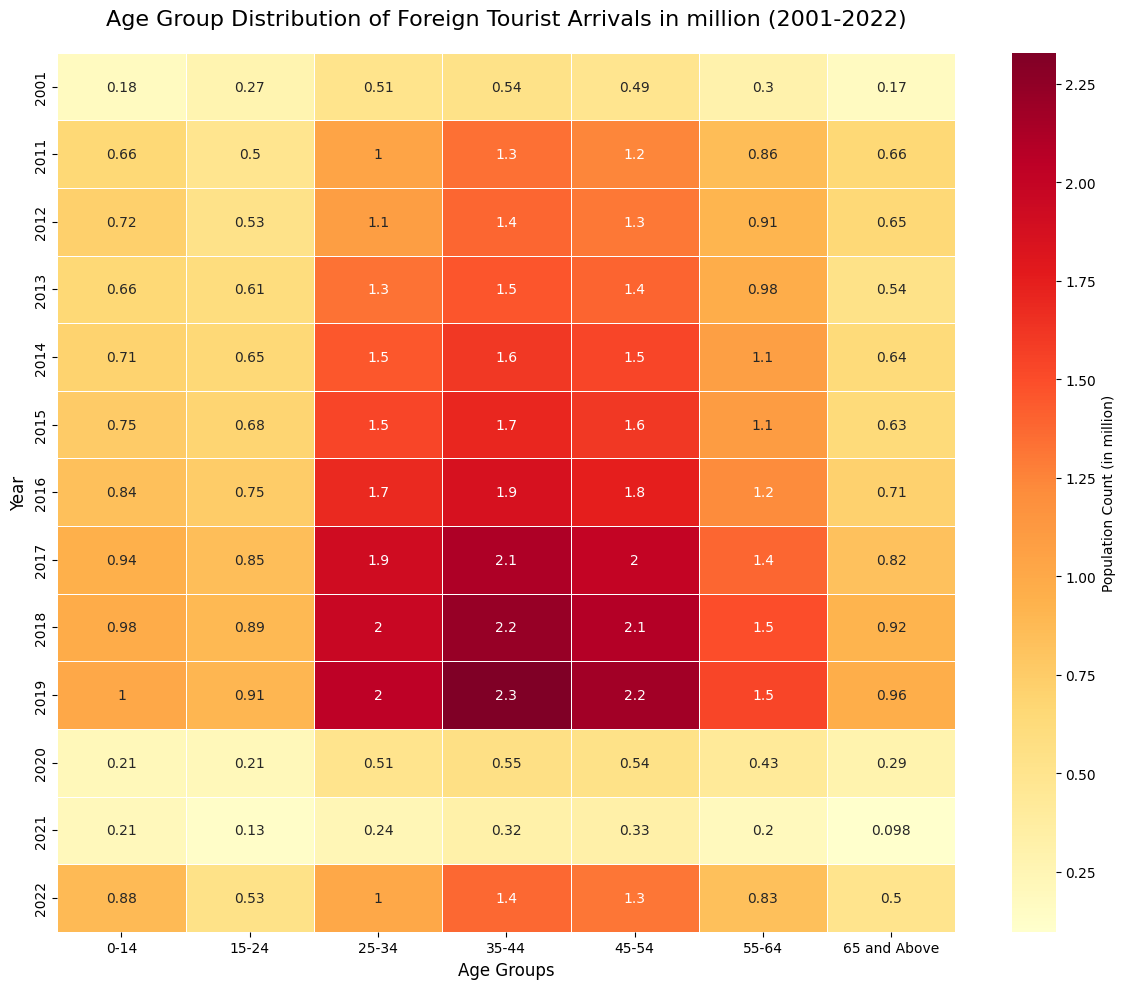

In [9]:
#creating a heatmap plot for better undestanding

#preparing the data 
heatmap_data = df.set_index('Year').drop(columns=['FTAs'])

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, 
            annot=True,           # Show values in cells
            cmap='YlOrRd',        # Color scheme (Yellow-Orange-Red)
            cbar_kws={'label': 'Population Count (in million)'},
            linewidths=0.5,       # Add lines between cells
            linecolor='white')

plt.title("Age Group Distribution of Foreign Tourist Arrivals in million (2001-2022)", fontsize=16, pad=20)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()


#saving the plot 

plt.savefig('Age Group Distribution of Foreign Tourist Arrivals in million(2001-2022).png', 
            dpi=300,                    # High resolution
            bbox_inches='tight',        # Remove extra whitespace
            facecolor='white',          # White background
            edgecolor='none',           # No border
            pad_inches=0.1)             # Small padding

In [14]:
#changing the column names 

df.columns = ["year_22 ",
            "FTAs",              
            "age_0_14" , 
            "age_15_24" ,
            "age_25_34" ,
            "age_35_44" ,
            "age_45_54" ,
            "age_55_64" ,
            "age_65_and_above"]


In [18]:
#adding data into sql 

conn = sqlite3.connect('age_wise_distribution.db')
df.to_sql('distributin_of_24', conn, if_exists='replace', index=False)
conn.close()


In [13]:
df

,year_22,FTAs,age_0_14,age_15_24,age_25_34,age_35_44,age_45_54,age_55_64,age_65_and_above
0,2001,2537282.0,0.177610,0.274026,0.509994,0.535366,0.492233,0.301937,0.169998
1,2011,6309222.0,0.662468,0.498429,1.047331,1.337555,1.242917,0.864363,0.662468
2,2012,6577745.0,0.723552,0.526220,1.085328,1.381326,1.302394,0.914307,0.651197
3,2013,6967601.0,0.661922,0.606181,1.330812,1.463196,1.393520,0.975464,0.536505
4,2014,7679099.0,0.706477,0.652723,1.451350,1.612611,1.543499,1.075074,0.637365
5,2015,8027133.0,0.754551,0.682306,1.541210,1.701752,1.605427,1.107744,0.634144
6,2016,8804411.0,0.836419,0.748375,1.690447,1.857731,1.752078,1.215009,0.713157
7,2017,10035803.0,0.943365,0.853043,1.916838,2.117554,1.997125,1.384941,0.822936
8,2018,10557976.0,0.981892,0.886870,1.963784,2.217175,2.090479,1.499233,0.918544
9,2019,10930355.0,1.005593,0.907219,2.033046,2.328166,2.164210,1.541180,0.961871
